In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy, pandas, seaborn as plotse, os, matplotlib.pyplot as plotmat
from IPython.display import display, HTML

from sklearn import linear_model, svm, neighbors, neural_network, ensemble, tree
from sklearn import utils,decomposition,preprocessing, pipeline
from sklearn import metrics,model_selection, feature_selection

In [2]:
def DataClnHrt(data_1): 
    ftct=data_1.dtypes[data_1.dtypes=='object'].index.tolist()   
    clean_fets=[[] for i in range(len(ftct))]
    for i in range(len(ftct)):
        for j in range(len(data_1[ftct[i]].tolist())): 
            if data_1[ftct[i]].tolist()[j]=="?":   
                clean_fets[i].append(0)    
            else:
                clean_fets[i].append(data_1[ftct[i]].tolist()[j]) 
        data_1[ftct[i]]=numpy.array(clean_fets[i],float) 
    print(data_1.info())
    return data_1 

In [3]:
fets_hearts=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
dirfiles=os.listdir(os.getcwd()) 
data_to_take=[]
for drf in dirfiles:
    if ".data" in drf:
        data_to_take.append(drf)
H1,H2,H3=pandas.read_csv(data_to_take[0],names=fets_hearts),pandas.read_csv(data_to_take[0],names=fets_hearts),pandas.read_csv(data_to_take[0],names=fets_hearts)
Data_1H=pandas.concat([H1,H2,H3])
Data_1H=utils.resample(Data_1H, replace = True, n_samples = len(Data_1H)*2, random_state = 0).reset_index(drop=True)
Data_1H=utils.resample(Data_1H, replace = True, n_samples = int(len(Data_1H)/2), random_state = 0).reset_index(drop=True)
print(len(H1),len(H2),len(H3))
print("Total Instances (Patients Records) in Data-1: ",len(H1))
print("Total Instances (Patients Records) in Data-2: ",len(H2))
print("Total Instances (Patients Records) in Data-3: ",len(H3))
print("Data Records (Total): ",len(Data_1H))
Data_1H.head()

303 303 303
Total Instances (Patients Records) in Data-1:  303
Total Instances (Patients Records) in Data-2:  303
Total Instances (Patients Records) in Data-3:  303
Data Records (Total):  909


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55.0,0.0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,54.0,1.0,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,2
3,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0
4,50.0,1.0,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       909 non-null    float64
 1   sex       909 non-null    float64
 2   cp        909 non-null    float64
 3   trestbps  909 non-null    float64
 4   chol      909 non-null    float64
 5   fbs       909 non-null    float64
 6   restecg   909 non-null    float64
 7   thalach   909 non-null    float64
 8   exang     909 non-null    float64
 9   oldpeak   909 non-null    float64
 10  slope     909 non-null    float64
 11  ca        909 non-null    float64
 12  thal      909 non-null    float64
 13  target    909 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 99.5 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55.0,0.0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,54.0,1.0,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,2
3,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0
4,50.0,1.0,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0


In [5]:
ClassHl,ClassHr="Healthy","Heart Disease"
Data_1H['target']=Data_1H['target'].replace(Data_1H['target'].unique(),[ClassHl,ClassHr,ClassHr,ClassHr,ClassHr])
Data_1H['sex']=Data_1H['sex'].replace(Data_1H['sex'].unique(),["Male","Female"]) 
Data_1H.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55.0,Male,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,Healthy
1,37.0,Female,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,Healthy
2,54.0,Female,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,Heart Disease
3,65.0,Male,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,Healthy
4,50.0,Female,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,Healthy


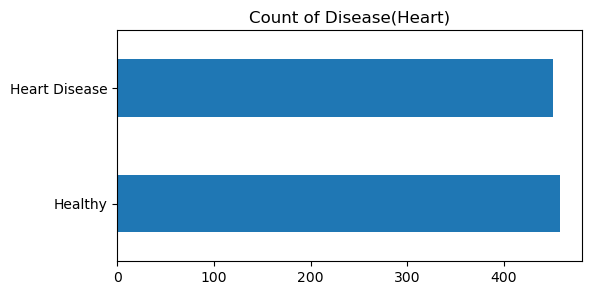

In [6]:
Data_1H['target'].value_counts().plot(kind='barh',title="Count of Disease(Heart)",figsize=(6,3))  
plotmat.show()    

<AxesSubplot:title={'center':'Heart Disease by Gender'}, ylabel='sex'>

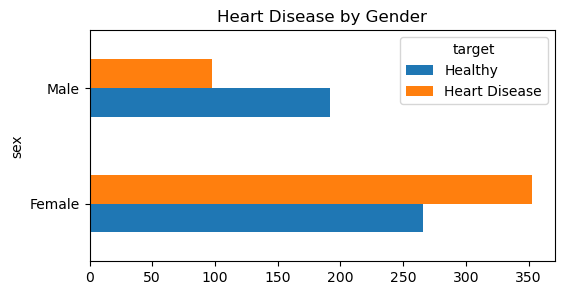

In [7]:
pandas.crosstab(Data_1H.sex,Data_1H.target).plot(kind='barh',title="Heart Disease by Gender",figsize=(6,3))

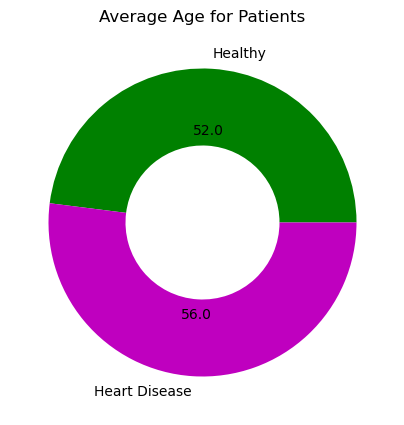

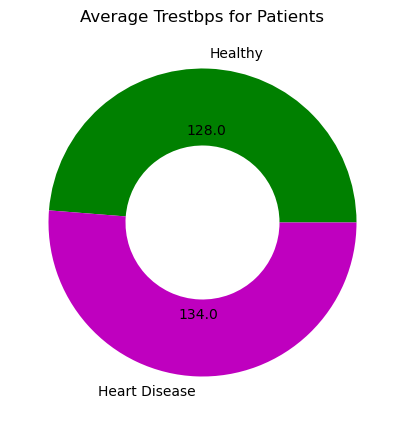

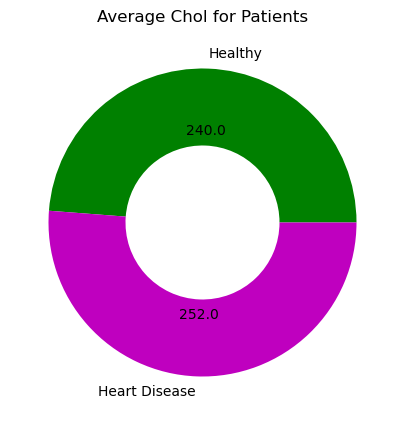

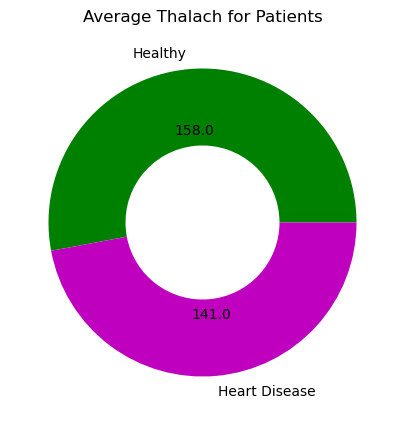

In [8]:
VizFets=["age",
       "trestbps",
       "chol",
       "thalach"
      ] 
hds=Data_1H[Data_1H['target']==ClassHl]
hlt=Data_1H[Data_1H['target']==ClassHr]

for c in VizFets:  
    healthy_mean=hds[c].mean()
    hrt_mean=hlt[c].mean()
    arr=numpy.array([healthy_mean,hrt_mean])
    def val(x):
        val_abs  = numpy.round(x/100.*arr.sum(), 0)
        return val_abs
    plotmat.figure(figsize=(5,5))
    plotmat.title("Average {} for Patients".format(c.capitalize()))
    plotmat.pie([healthy_mean,hrt_mean],labels=Data_1H['target'].unique(), autopct=val,wedgeprops={"width":0.5},colors=["g","m"])
    plotmat.show()

In [9]:
Data_2K=pandas.read_csv("kidney_disease.csv") 
Data_2K.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [10]:
Data_2K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
Data_2K.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [12]:
def Clean_Kidney_Data(data_2): 
    try:
        data_2['classification']=data_2['classification'].replace(data_2['classification'].unique(),['ckd','ckd','notckd'])
    except: 
        pass
    obdata_2=data_2.dtypes[data_2.dtypes=='object'].index.tolist() 
    nmdata_2=data_2.dtypes[data_2.dtypes!='object'].index.tolist()
    for oc in obdata_2:
        data_2[oc]=data_2[oc].fillna(data_2[oc].mode()[0])
    for nc in nmdata_2:
        data_2[nc]=data_2[nc].fillna(data_2[nc].mode()[0])
    transfets=['pcv', 'wc', 'rc']
    for t in transfets: 
        dtarr=numpy.array(data_2[t]) 
        formed_fets=[] 
        for x in dtarr:
            if x.isdigit()==False:
                formed_fets.append(0)
            else:
                formed_fets.append(x)
        data_2[t]=numpy.array(formed_fets,float)
    print(data_2.isna().sum())
    print(data_2.info())
    print(data_2['classification'].value_counts())
    return data_2
Data_2Kcln=Clean_Kidney_Data(Data_2K)
Data_2Kcln.head(10)

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,0.0,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,0.0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,0.0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,0.0,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,0.0,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,...,39.0,7800.0,0.0,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,...,36.0,9800.0,0.0,no,no,no,good,no,no,ckd
7,7,24.0,80.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33.0,9600.0,0.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29.0,12100.0,0.0,yes,yes,no,poor,no,yes,ckd


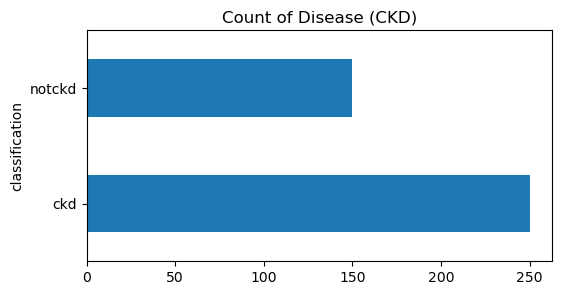

In [13]:
Data_2Kcln['classification'].value_counts().plot(kind='barh',title="Count of Disease (CKD)",figsize=(6,3))
plotmat.show()

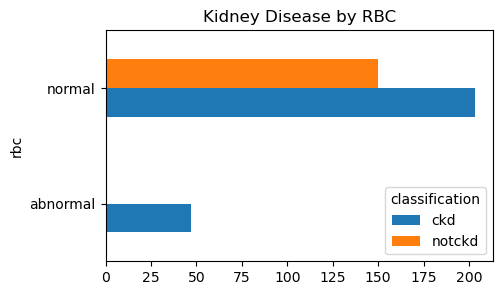

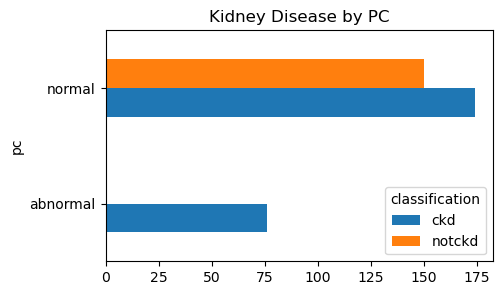

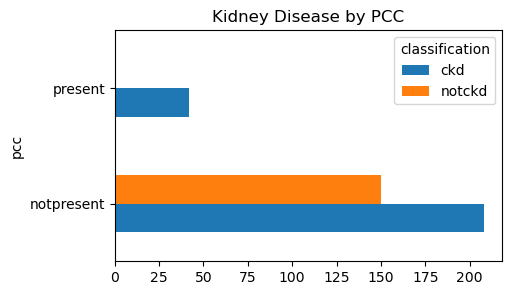

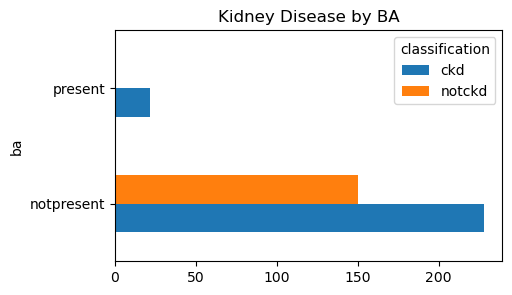

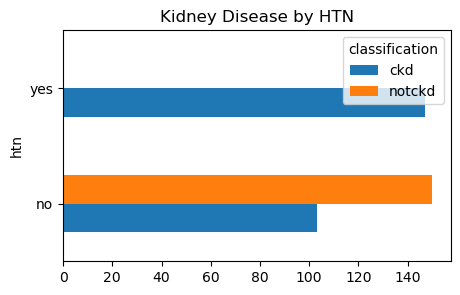

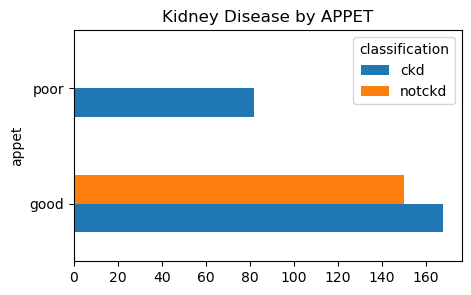

In [14]:
fets=['rbc','pc','pcc','ba','htn','appet']
for f in fets:
    pandas.crosstab(Data_2K[f],Data_2K.classification).plot(kind='barh',title="Kidney Disease by {}".format(f.upper()),figsize=(5,3))
    plotmat.show()

In [15]:
Data_1H.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55.0,Male,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,Healthy
1,37.0,Female,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,Healthy
2,54.0,Female,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,Heart Disease
3,65.0,Male,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,Healthy
4,50.0,Female,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,Healthy


In [16]:
Data_2K.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,0.0,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,0.0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,0.0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,0.0,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,0.0,no,no,no,good,no,no,ckd


In [17]:
def EncodingFunc(data, dn): 
    data_opr=data.copy()
    print("Information Before Encdoing {} Data:\n".format(dn))   
    print(data_opr.info()) 
    ctdata_opr=data_opr.dtypes[data_opr.dtypes=='object'].index.tolist()[:-1] 
    print(ctdata_opr)
    for c in ctdata_opr:
        data_opr[c]=data_opr[c].replace(data_opr[c].unique(),[x for x in range(len(data_opr[c].unique()))]) 
    print("Information After Encdoing {} Data:\n".format(dn))   
    print(data_opr.info())
    return data_opr

In [18]:
alldt=[Data_1H, Data_2K]
HKDt=['Heart Disease','Kidney Disease'] 
EncDts=[]
for d in range(len(alldt)):
    EncDts.append(EncodingFunc(alldt[d], HKDt[d]))

Information Before Encdoing Heart Disease Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       909 non-null    float64
 1   sex       909 non-null    object 
 2   cp        909 non-null    float64
 3   trestbps  909 non-null    float64
 4   chol      909 non-null    float64
 5   fbs       909 non-null    float64
 6   restecg   909 non-null    float64
 7   thalach   909 non-null    float64
 8   exang     909 non-null    float64
 9   oldpeak   909 non-null    float64
 10  slope     909 non-null    float64
 11  ca        909 non-null    float64
 12  thal      909 non-null    float64
 13  target    909 non-null    object 
dtypes: float64(12), object(2)
memory usage: 99.6+ KB
None
['sex']
Information After Encdoing Heart Disease Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #

In [19]:
EncDts[0].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55.0,0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,Healthy
1,37.0,1,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,Healthy
2,54.0,1,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,Heart Disease
3,65.0,0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,Healthy
4,50.0,1,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,Healthy


In [20]:
EncDts[1].head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,...,44.0,7800.0,0.0,0,0,0,0,0,0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,...,38.0,6000.0,0.0,1,1,0,0,0,0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,...,31.0,7500.0,0.0,1,0,0,1,0,1,ckd
3,3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,...,32.0,6700.0,0.0,0,1,0,1,1,1,ckd
4,4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,...,35.0,7300.0,0.0,1,1,0,0,0,0,ckd
